## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
list(mouse_metadata.columns.values)

['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

In [4]:
list(study_results.columns.values)

['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']

In [5]:
# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
mice_count = len(pymaceuticals_df["Mouse ID"].unique())
mice_count

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = pymaceuticals_df[pymaceuticals_df["Mouse ID"] == 'g989'] 
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pymaceuticals_df[pymaceuticals_df["Mouse ID"].isin(g989_df) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df["Mouse ID"].unique())
mice_count_clean

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

# summary_df = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
sd = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)

analysis_df=pd.DataFrame({"mean":mean,"median":median,"variance":variance, "σ": sd, "SEM": sem})

analysis_df

,mean,median,variance,σ,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

analysis_df.groupby(["Drug Regimen"]).describe().unstack().reset_index()

analysis_df

,mean,median,variance,σ,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [14]:
%matplotlib notebook

In [15]:
clean_df.Timepoint.unique() 

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [16]:
list(clean_df.columns.values)

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

### Created Stacked Bar Chart in Pandas

Unsure of instructions...
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<IPython.core.display.Javascript object>


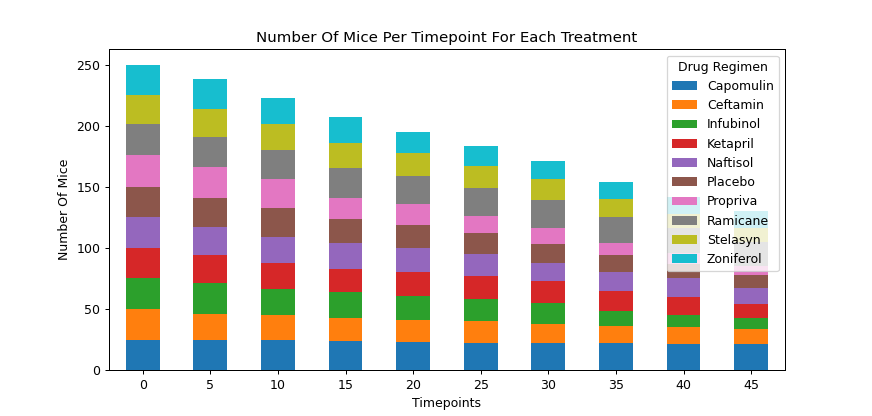

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.

clean_df2 = clean_df.groupby(['Timepoint', 'Drug Regimen'])['Timepoint'].count().unstack('Drug Regimen').fillna(0)
clean_df2.plot.bar(stacked=True);

# Title, labels, Formatting
plt.xlabel("Timepoints")
plt.ylabel("Number Of Mice")
plt.title("Number Of Mice Per Timepoint For Each Treatment")
plt.xticks(rotation=0, horizontalalignment="center")
# plt.legend(frameon=False);

plt.show()

### Or Create Multi-Column Bar Chart?
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

### Created Stacked Bar Chart in Matplotlib

Or at least attempted to.
https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/bar_stacked.html

In [21]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<IPython.core.display.Javascript object>


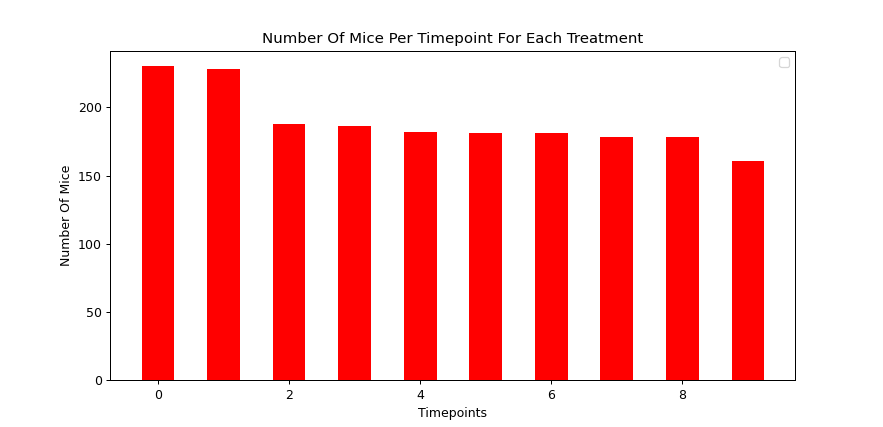

No handles with labels found to put in legend.


In [45]:
drug_counts = clean_df["Drug Regimen"].value_counts()
y_axis = drug_counts.values
tick_locations = [0]

# Creating variables for my axis
x_axis = np.arange(0,len(y_axis),1)
for x in x_axis:
    tick_locations.append(x)

# x_axis = drug_counts.index
                 
# Needs to be matplotlib
plt.bar(x_axis, y_axis, color='r', alpha=1, align= "center", width= .5)

# Title, labels, Formatting
plt.xlabel("Timepoints")
plt.ylabel("Number Of Mice")
plt.title("Number Of Mice Per Timepoint For Each Treatment")
plt.xticks(rotation=0, horizontalalignment="center")
plt.legend(frameon = True)

plt.show()

## Pie Plots

### Pie Plots using Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
gender_count



Male      958
Female    935
Name: Sex, dtype: int64

In [ ]:
# # Data
# sizes = gender_count.values


# # Labels
# labels = gender_count.index

# # Colors
# colors=["lightblue", "pink"]

# # Pie Chart
# plot = df.plot.pie(y=sizes, figsize=(5, 5))


# #Formatting
# plt.title("Gender Distribution")
# plt.show()

<IPython.core.display.Javascript object>


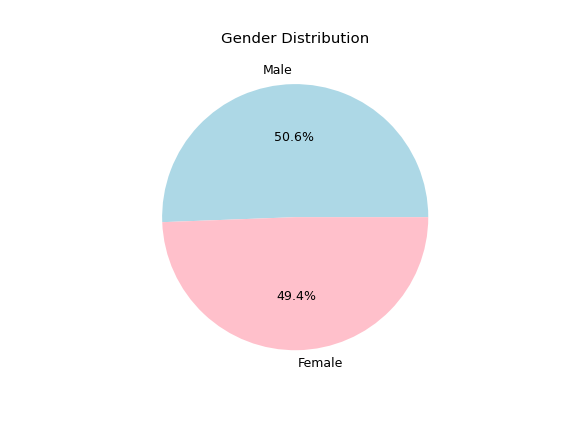

In [89]:
# Struggled with using the data frame so hard coded.
df = pd.DataFrame({'gender_ct': [.506, .494]},
                  index=['Male', 'Female'])

colors=["lightblue", "pink"]

plot = df.plot.pie(y='gender_ct', colors = colors, legend = False, autopct="%1.1f%%")

plt.ylabel("")
plt.title("Gender Distribution")
plt.show()

<IPython.core.display.Javascript object>


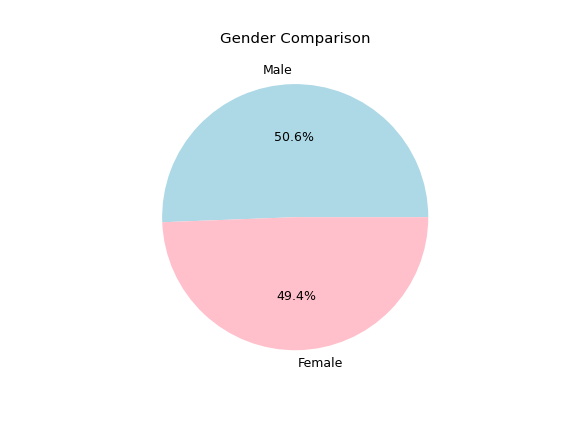

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_df["Sex"].value_counts()

# Values
sizes = gender_count.values

# Color Formatting
colors = ["lightblue", "pink"]

mf_count.plot(kind="pie", colors=colors, autopct="%1.1f%%")

#Formatting
plt.ylabel("")
plt.title("Gender Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html#:~:text=Make%20a%20box%20and%20whisker%20plot%20for%20each%20column%20of,a%20line%20at%20the%20median.

In [140]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [153]:
best_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimens = best_regimens.sort_values(["Timepoint"], ascending=True)

best_regimens_df = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimens_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


<IPython.core.display.Javascript object>


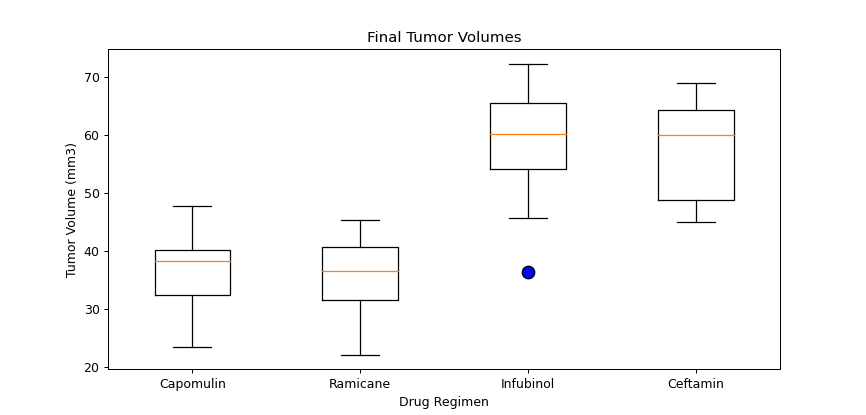

In [155]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = best_regimens_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

# Labels
labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_vol = best_regimen_df.reset_index()
tumor_lists = final_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(labels)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
blue_dot = dict(markerfacecolor='blue', markersize=10)

plt.boxplot(tumor_vols, labels= labels, flierprops = blue_dot)

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volumes")

plt.show()

In [94]:
max_tumor = clean_df.groupby("Mouse ID").max().reset_index()
max_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
merge_data = max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29


## Line and Scatter Plots

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<IPython.core.display.Javascript object>


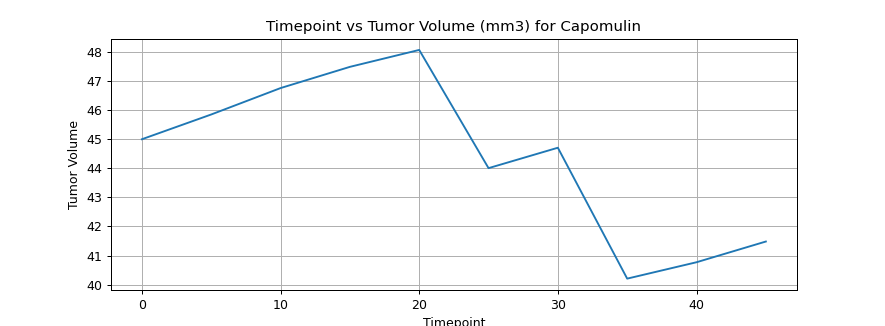

In [120]:
mouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']

x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Timepoint vs Tumor Volume (mm3) for Capomulin")
plt.grid(True)
plt.show()

In [108]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<IPython.core.display.Javascript object>


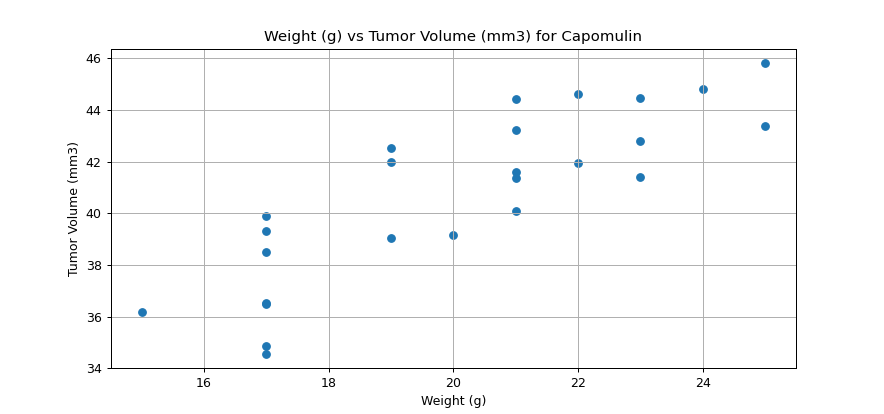

In [121]:
mouse_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_avg = mouse_weight.groupby(["Mouse ID"]).mean()

x_axis = cap_avg["Weight (g)"]
y_axis = cap_avg["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) vs Tumor Volume (mm3) for Capomulin")
plt.grid(True)
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


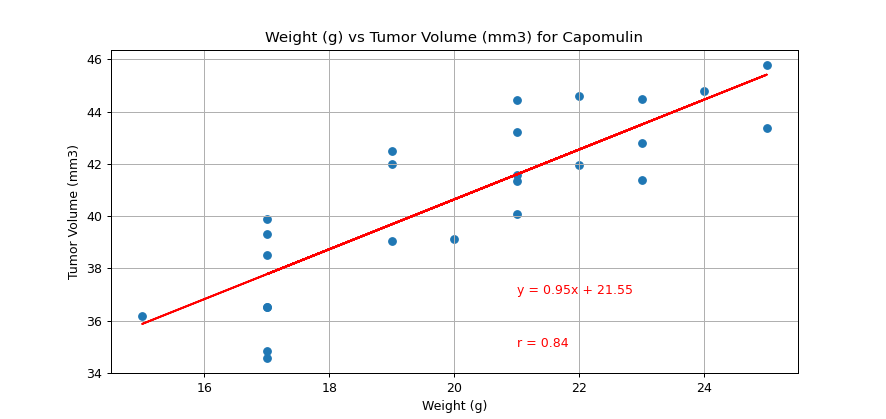

In [135]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = cap_avg["Weight (g)"] * slope + intercept

# Scatter Plot, same as above
x_axis = cap_avg["Weight (g)"]
y_axis = cap_avg["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)

# Regression Line
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq,(21,37), color='red', fontsize=10)
plt.annotate(r_value,(21,35), color='red', fontsize=10)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) vs Tumor Volume (mm3) for Capomulin")
plt.grid(True)
plt.show()